# 회귀분석 on 평점 & 매출액
### 네이버 api+영진위

In [52]:
import numpy as np
import pandas as pd
import json
import time

In [53]:
df = pd.read_csv('movie.csv', encoding='ms949', index_col=[0,1])

In [54]:
df.reset_index(inplace=True)

In [55]:
# 영화 이름만 리스트에 담음
movie_title = df['영화명'].values.tolist()
movie_title[:5]

['아바타', '아저씨', '인셉션', '의형제', '아이언맨 2']

### use naver api to get 평점

In [5]:
# import os
# import sys
# import urllib.request

# client_id = "PAsKLiqEIeAcb0BGXcAv"
# client_secret = "toPoLTL6en"
# movie = []

In [6]:
# for i in range(900):
#     encText = urllib.parse.quote(movie_title[i])

#     url = "https://openapi.naver.com/v1/search/movie?query=" + encText # json 결과
#     request = urllib.request.Request(url)
#     request.add_header("X-Naver-Client-Id",client_id)
#     request.add_header("X-Naver-Client-Secret",client_secret)
#     response = urllib.request.urlopen(request)
#     rescode = response.getcode()
    
#     if(rescode==200):
#         response_body = response.read()
#         movie.append(response_body.decode('utf-8'))
#         time.sleep(1)
#     else:
#         print("Error Code:" + rescode)

In [18]:
len(movie)

900

### <font color=blue> 396번째 movie(헨젤과 그레텔: 마녀 사냥꾼 3D)에 문제 있어서 걔는 빼고 </font>

In [19]:
json.loads(movie[395])

{'lastBuildDate': 'Thu, 09 May 2019 16:23:14 +0900',
 'total': 9,
 'start': 1,
 'display': 9,
 'items': [{'title': '<b>롤러코스터</b>',
   'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=100801',
   'image': 'https://ssl.pstatic.net/imgmovie/mdi/mit110/1008/100801_P13_134332.jpg',
   'subtitle': 'Fasten Your Seatbelt',
   'pubDate': '2013',
   'director': '하정우|',
   'actor': '정경호|한성천|',
   'userRating': '6.35'},
  {'title': '<b>롤러코스터</b> 3',
   'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=101250',
   'image': 'https://ssl.pstatic.net/imgmovie/mdi/mit110/1012/101250_P01_181907.jpg',
   'subtitle': '',
   'pubDate': '2013',
   'director': '',
   'actor': '유상무|김지민|최종훈|안영미|강유미|양세찬|이용진|김성원|김영희|변서은|성현주|윤진영|',
   'userRating': '6.75'},
  {'title': '스윗<b>롤러코스터</b> : 케익위의 요정들',
   'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=117177',
   'image': 'https://ssl.pstatic.net/imgmovie/mdi/mit110/1171/117177_P01_174548.jpg',
   'subtitle': 'Sweet Rollercoaster : Th

### 에러나는 곳 발견

In [20]:
json.loads(movie[396])

{'lastBuildDate': 'Thu, 09 May 2019 16:23:15 +0900',
 'total': 0,
 'start': 1,
 'display': 0,
 'items': []}

In [21]:
json.loads(movie[397])

{'lastBuildDate': 'Thu, 09 May 2019 16:23:16 +0900',
 'total': 1,
 'start': 1,
 'display': 1,
 'items': [{'title': '<b>파이스토리 : 악당상어 소탕작전</b>',
   'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=100938',
   'image': 'https://ssl.pstatic.net/imgmovie/mdi/mit110/1009/100938_P15_103229.jpg',
   'subtitle': 'The Reef 2: High Tide',
   'pubDate': '2012',
   'director': '마크 A.Z. 디페|박태동|',
   'actor': '드레이크 벨|앤디 딕|',
   'userRating': '8.66'}]}

In [56]:
# rating 이라는 빈 리스트에 userRating만 담는다
rating = []
for i in range(900):
    if i != 396:
        rating.append(json.loads(movie[i])['items'][0]['userRating'])
#rating

In [57]:
len(rating)

899

In [58]:
df.drop([396], inplace=True)

In [59]:
# 평점 컬럼에 추가
df['평점'] = rating

In [60]:
# 113개의 평점은 문제가 있음
df[df['평점']=='0.00']['영화명'].count()

113

In [61]:
df[df['평점']=='0.00'].index

Int64Index([  1,   8,   9,  10,  17,  19,  20,  21,  38,  46,
            ...
            770, 776, 779, 781, 798, 810, 817, 823, 871, 895],
           dtype='int64', length=113)

In [62]:
# 과감히 날려버리기
df.drop(df.index[df[df['평점']=='0.00'].index], inplace=True)
df[df['평점']=='0.00']['영화명'].count()

45

In [63]:
df[df['평점']=='0.00'].index

Int64Index([427, 443, 455, 458, 463, 466, 490, 495, 500, 511, 516, 519, 523,
            537, 539, 541, 561, 582, 606, 610, 613, 619, 622, 660, 663, 666,
            685, 693, 695, 704, 725, 730, 734, 736, 767, 770, 776, 779, 781,
            798, 810, 817, 823, 871, 895],
           dtype='int64')

In [64]:
# df.drop([427], inplace=True)
df.drop([427, 443, 455, 458, 463, 466, 490, 495, 500, 511, 516, 519, 523,
            537, 539, 541, 561, 582, 606, 610, 613, 619, 622, 660, 663, 666,
            685, 693, 695, 704, 725, 730, 734, 736, 767, 770, 776, 779, 781,
            798, 810, 817, 823, 871, 895], inplace=True)

In [66]:
# 다 날렸음
df[df['평점']=='0.00']['영화명'].count()

0

In [73]:
# 평점 object 타입을 float 타입으로 바꾼다.
df["평점"] = df["평점"].replace("'","")
df["평점"] = df["평점"].astype(float)
type(df['평점'][0])

numpy.float64

In [74]:
# 평점 추가한 데이터프레임을 csv로 저장
df.to_csv('movie_rating_9yrs.csv', encoding='ms949')

In [75]:
df2 = pd.read_csv('movie_rating_9yrs.csv', encoding='ms949')
df2.head()

,Unnamed: 0,year,rank,index,영화명,개봉일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,제작사,배급사,등급,장르,감독,배우,평점
0,0,2010,1,0,아바타,2009-12-17,81455728000,124896892500,8151952,13302619,714,111860,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",12세이상관람가,"SF,액션,어드벤처",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",9.63
1,2,2010,3,2,인셉션,2010-07-21,43394990000,43394990000,5827444,5827444,531,81891,미국,"워너 브러더스 픽쳐스,레젼데리 픽쳐스",워너브러더스 코리아(주),12세이상관람가,"드라마,미스터리",크리스토퍼 놀란,"레오나르도 디카프리오,엘렌 페이지,마리온 꼬띨라르",4.00
2,3,2010,4,3,의형제,2010-02-04,40153729000,40153729000,5416812,5416812,569,118243,한국,"(주)쇼박스,(주)다세포클럽,루비콘픽쳐스㈜",(주)쇼박스,15세이상관람가,"드라마,액션",장훈,"송강호,강동원,전국환,박혁권,윤희석,최정우,정인기,설진욱,강명희,홍서백,박용진,김의...",8.86
3,4,2010,5,4,아이언맨 2,2010-04-29,32635195500,32635195500,4425003,4425003,921,87665,미국,"파라마운트 픽쳐스,마블 엔터프라이즈",씨제이엔터테인먼트,12세이상관람가,"SF,액션,어드벤처",존 파브로,"로버트 다우니 주니어,기네스 팰트로우,돈 치들,스칼렛 요한슨,미키 루크",7.36
4,5,2010,6,5,전우치,2009-12-23,26345113000,44092715000,3611472,6065355,556,73175,한국,영화사 집,씨제이엔터테인먼트,12세이상관람가,"액션,코미디,판타지",최동훈,"강동원,임수정,김윤석,유해진,염정아,김시권,주진모,김효진,강동균,정혜란,손선영,송진...",10.00


#  회귀식 -> 매출액 = b0 + b1*평점


In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg = smf.ols(formula = '매출액 ~ 평점',data = df2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 09 May 2019   Prob (F-statistic):            0.00146
Time:                        16:47:25   Log-Likelihood:                -18504.
No. Observations:                 741   AIC:                         3.701e+04
Df Residuals:                     739   BIC:                         3.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.118e+09   3.53e+09      0.883      0.378   -3.82e+09    1.01e+10
평점          1.435e+09   4.49e+08      3.194      0.001    5.53e+08    2.32e+09
==============================================================================
Omnibus:                      446.960   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3662.575
Skew:                           2.688   Prob(JB):                         0.00
Kurtosis:                      12.472   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
%matplotlib inline

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() #컴퓨터내에 설치되 있는 맑은고딕 폰트를 가져오겠다.
rc('font',family=font_name)

Text(0.5, 1.0, '최근 9년간 평점과 매출액')

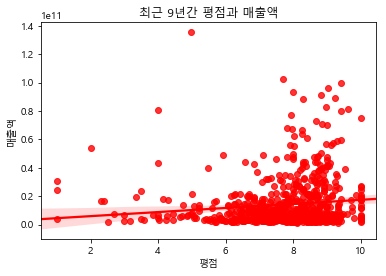

In [84]:
ax = sns.regplot('평점', '매출액', df, color='red')
ax.set_title("최근 9년간 평점과 매출액")

# 결과 해석: 상관성 제로